In [1]:
from PIL import Image as img
import numpy as np
import cv2
import matplotlib.pyplot as plt
lena=img.open('lena.bmp')
lena_arr = np.asarray(lena)

In [2]:
def Dilation(lena,mask):
    m=len(mask)
    n=len(mask[0])
    mm=len(lena)
    nn=len(lena[0])
    res=[[0]*nn for i in range(mm)]
    for i in range(m//2,mm-m//2):
        for j in range(n//2,nn-n//2):
            tmp=0
            for k in range(m):
                for l in range(n):
                    if mask[k][l]==1:
                        tmp=max(tmp,lena[i-(m//2-k)][j-(n//2-l)])
            res[i][j]=tmp
    return res

In [3]:
def Erosion(lena,mask):
    m=len(mask)
    n=len(mask[0])
    mm=len(lena)
    nn=len(lena[0])
    res=[[0]*nn for i in range(mm)]
    for i in range(m//2,mm-m//2):
        for j in range(n//2,nn-n//2):
            tmp=255
            for k in range(m):
                for l in range(n):
                    if mask[k][l]==1:
                        tmp=min(tmp,lena[i-(m//2-k)][j-(n//2-l)])
            res[i][j]=tmp
    return res

In [4]:
mask1=[[0,1,1,1,0],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[0,1,1,1,0]]
a=Dilation(lena_arr,mask1)
b=Erosion(lena_arr,mask1)

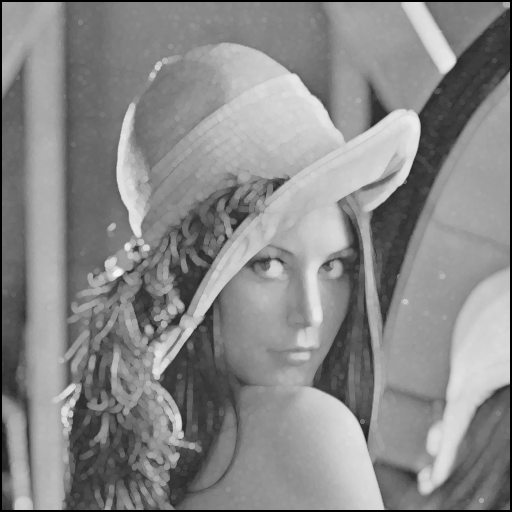

In [12]:
img.fromarray(np.array(a,dtype='uint8'))

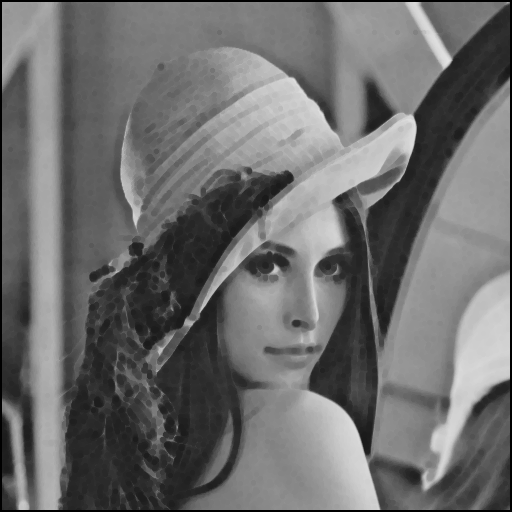

In [6]:
img.fromarray(np.array(b,dtype='uint8'))

In [7]:
def Opening(lena,mask):
    return Dilation(Erosion(lena,mask),mask)

In [8]:
def Closing(lena,mask):
    return Erosion(Dilation(lena,mask),mask)

In [9]:
mask1=[[0,1,1,1,0],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[0,1,1,1,0]]
c=Opening(lena_arr,mask1)
d=Closing(lena_arr,mask1)

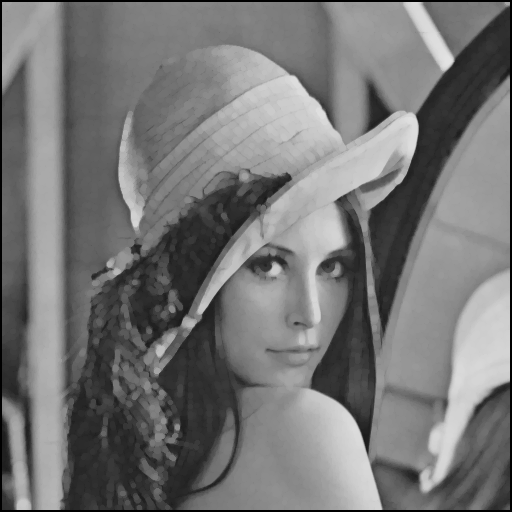

In [10]:
img.fromarray(np.array(c,dtype='uint8'))

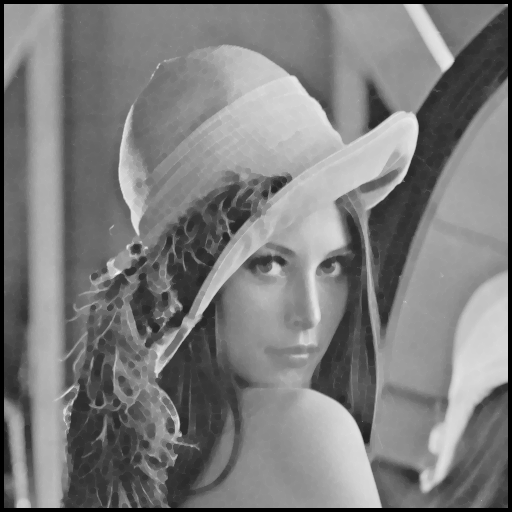

In [11]:
img.fromarray(np.array(d,dtype='uint8'))